# DS201 Final Project: Video Game Sales Prediction

<hr>

**Problem Description:**

This dataset contains several observations, each represents a single Video Game, with several features including a game title (text analysis?), metacritic rating for the game, publisher, developer, etc...

**Warning**: Not every game has a matching metacritic review, as some of the older games existed before the time of metacritic. So you will have to weigh your options with this missing data, drop, fill in, etc...

Your taks is to predict the ```Global Sales``` column, you must perform some EDA to find which features are most strongly correlated with the ```Global_sales``` figure, clean and preprocess the data, split up dataset into test and train, model the data against several models, and evaluate model performance to find the most performant model.
<hr>

**Remember! Although These processces have been talked about as a series of steps:**

1) EDA

2) Cleaning

3) Feat Engineering

4) Modeling

5) Model Evaluation

**This is more of an iterative process!** 

You may build a model only to find you're accuracy is low, which will require you to go back and engineer new features or maybe preform some more EDA to ensure that you've selected the most important features, given the problem at hand.

<hr>

**Problem Description:**

This dataset contains several observations, each represents a single Video Game, with several features including a game title (text analysis?), metacritic rating for the game, publisher, developer, etc...

**Warning**: Not every game has a matching metacritic review, as some of the older games existed before the time of metacritic. So you will have to weigh your options with this missing data, drop, fill in, etc...

Your taks is to predict the ```Global Sales``` column, you must perform some EDA to find which features are most strongly correlated with the ```Global_sales``` figure, clean and preprocess the data, split up dataset into test and train, model the data against several models, and evaluate model performance to find the most performant model.
<hr>

**Remember! Although These processces have been talked about as a series of steps:**

1) EDA

2) Cleaning

3) Feat Engineering

4) Modeling

5) Model Evaluation

**This is more of an iterative process!** 

You may build a model only to find you're accuracy is low, which will require you to go back and engineer new features or maybe preform some more EDA to ensure that you've selected the most important features, given the problem at hand.

<hr>
<br>

## Imports

## Load Data

In [2]:
# EDA and Feature Engineering
import pandas as pd
pd.set_option('max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.neighbors import KNeighborsRegressor #KNN

# Machine Learning Model Evaluation
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [3]:
# Import RandomForestClassifier and GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingRegressor  
# import make_pipeline from sklearn.pipeline
from sklearn.pipeline import make_pipeline 
# import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler 
# import GridSearchCV from sklearn.model_selection

In [6]:
model_whole = pd.read_csv("./data/vg_ready_model_whole_nor.csv")

In [59]:
type(X_train)

numpy.ndarray

In [7]:
model_whole.head()

,Genre,Global_Sales,Critic_Score,User_Score,Rating,Avg_Sale_by_Pub,Avg_Sale_by_Plat,High_Usr_Crt_Score,Avg_Sale_by_Name,Avg_Sale_by_Dev
0,0.947899,40.24,7.552427,7.91843,1.369208,2.43804,2.561939,1,7.476818,3.007817
1,0.595606,35.52,8.200000,8.30000,0.593403,2.43804,0.625929,1,1.984538,3.007817
2,0.536978,32.77,8.000000,8.00000,0.593403,2.43804,0.625929,1,1.984538,3.007817
3,0.631337,31.37,7.552427,7.91843,0.354420,2.43804,2.606633,1,5.817222,3.007817
4,0.429391,30.26,7.552427,7.91843,1.369208,2.43804,2.606633,1,1.460840,3.007817


In [8]:
features = model_whole.drop(['Global_Sales'], axis=1)
target = model_whole['Global_Sales']

In [10]:
# Standardize X_train
# X_train_new = (X_train - X_train.mean()) / X_train.std()
features = (features - features.mean()) / features.std() 


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=122, shuffle=True )

C:\Users\iamal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (12219, 9) y_train: (12219,)
X_test: (4073, 9) y_test: (4073,)


In [13]:
# So we can print entire matrices without truncating
import sys
np.set_printoptions(threshold=sys.maxsize)

In [14]:
model = KNeighborsRegressor(n_neighbors=4)

In [15]:
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [16]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [17]:
# approximate matching y_test
predictions = model.predict(X_test)

In [18]:
print('The accuracy of the KNN is', model.score(X_test, y_test))

The accuracy of the KNN is 0.4335264546655022


In [19]:
print(predictions)
print(y_test)

[6.74000e+00 2.87500e-01 4.25000e-02 3.42500e-01 3.50000e-02 1.12500e-01
 1.09175e+01 5.60000e-01 6.00000e-01 4.75000e-01 1.35000e-01 3.20000e-01
 3.50000e-02 1.32500e-01 2.40000e-01 5.75000e-02 6.37500e-01 7.50000e-01
 5.92500e-01 3.00000e-01 5.02500e-01 7.00000e-02 4.10000e-01 9.25000e-02
 9.50000e-02 5.00000e-02 3.12500e-01 3.00000e-01 2.07500e-01 8.50000e-02
 2.52500e-01 3.30000e-01 4.00000e-02 1.62500e-01 1.65000e-01 1.15000e-01
 1.10000e-01 6.27500e-01 2.87500e-01 3.72500e-01 1.75000e-02 3.40000e-01
 3.42500e-01 3.35000e-01 4.00000e-02 3.60000e-01 1.54500e+00 1.60750e+00
 1.46750e+00 8.50000e-02 9.75000e-02 1.01250e+00 2.52750e+00 1.57500e-01
 5.57500e-01 2.25000e-01 1.37500e-01 3.30000e-01 8.72500e-01 1.65000e-01
 6.27500e-01 1.21250e+00 5.75000e-02 7.17500e-01 9.75000e-02 5.95000e-01
 1.52500e-01 7.50000e-01 3.50000e-02 1.67500e-01 4.45000e-01 7.00000e-02
 1.13500e+00 1.37500e-01 2.15000e-01 1.25000e-01 1.37500e-01 4.07500e-01
 8.00000e-02 2.47500e-01 2.30000e-01 6.62500e-01 2.

In [20]:
y_t = y_test[0 :100]
for index, pred in enumerate(predictions):
#     print( y_t, pred)
    print(pred, y_test[index])
    break

KeyError: 0

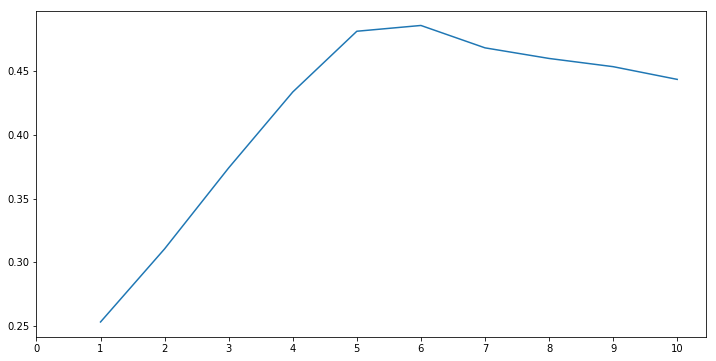

In [21]:
neighbors = list(range(1,11))
accuracy = pd.Series()


for neighbor in neighbors:
    model = KNeighborsRegressor(n_neighbors = neighbor) 
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy.append(pd.Series(model.score(X_test, y_test)))


# Build Plot of num_neighbor vs accuracy    
plt.plot(neighbors, accuracy)

# Plot styles
ticks = [0,1,2,3,4,5,6,7,8,9,10]
plt.xticks(ticks)
fig = plt.gcf()
fig.set_size_inches(12,6)


plt.show()

## With Pipelines

In [22]:
# Import ElasticNet, Ridge, and Lasso Regression from sklearn.linear_model
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import RandomForest and GradientBoosting Regressors from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [23]:
# Create pipelines dictionary
pipeline_dict = { 'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
                 'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
                 'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)) }

In [24]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [25]:
# Add a pipeline for 'rf' to 'pipeline_dict'
pipeline_dict['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))

# Add a pipeline for 'gb' to 'pipeline_dict'
pipeline_dict['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

In [26]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipeline_dict.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [27]:
# Lasso hyperparameters
lasso_hyperparameters = { 'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

# Ridge hyperparameters 
ridge_hyperparameters = { 'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

In [28]:
# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }

In [29]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [30]:
# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [31]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [32]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    
    if key in hyperparameters:
        
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
            
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
            
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [33]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [34]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipeline_dict['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [35]:
# Fit and tune model
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through pipeline_dict.items(), grabing the name and pipeline, creating a new model and tuning it on each iteration.
for name, pipeline in pipeline_dict.items():
    
    # 1. Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # 2. Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # 3. Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # 4. Print name 'has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [37]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.304307579093292
ridge 0.30318111222813865
enet 0.3065072730807393
rf 0.39211350325313155
gb 0.34388965006916145


In [38]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error

In [39]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

In [40]:
# Calculate and print R^2 and MAE
print('R^2: ', r2_score(y_test, pred))
print('MAE: ', mean_absolute_error(y_test, pred))

R^2:  0.5305436187658121
MAE:  0.3705964749564704


In [41]:
# Code here
for name, model in fitted_models.items(): 
    pred_var = model.predict(X_test)
    print(name)
    print('R^2: ', r2_score(y_test, pred_var))
    print('MAE: ', mean_absolute_error(y_test, pred_var))
    print('===================================')

lasso
R^2:  0.3825354405228
MAE:  0.44530778224826767
ridge
R^2:  0.388108892058175
MAE:  0.4624898127449854
enet
R^2:  0.3821948826264838
MAE:  0.4550790716535305
rf
R^2:  0.5305436187658121
MAE:  0.3705964749564704
gb
R^2:  0.5061659440736428
MAE:  0.40067866642585837


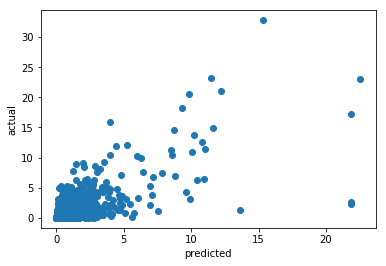

In [42]:
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [43]:
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.33, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])